In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point

<AxesSubplot:>

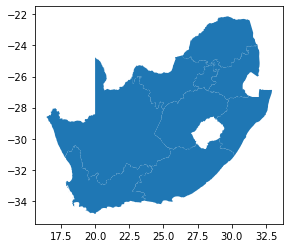

In [2]:
SouthAfrica = gpd.read_file(r'C:\Users\user\Documents\ANACONDA DOC\South Africa\data\South_Africa_Neuroscience\SHP\zaf_admbnda_adm1_sadb_ocha_20201109.shp')
SouthAfrica.plot()

<GeoAxesSubplot:>

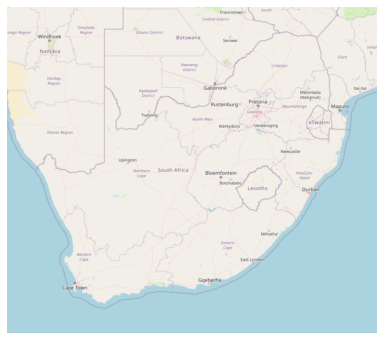

In [3]:
gplt.webmap(SouthAfrica, projection=gcrs.WebMercator())

In [5]:
gdf0 = gpd.GeoDataFrame(pd.read_csv('SA_GPS.csv', encoding='latin-1'), geometry=gpd.points_from_xy(pd.read_csv('SA_GPS.csv', encoding='latin-1').Long, pd.read_csv('SA_GPS.csv', encoding='latin-1').Lat))

C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


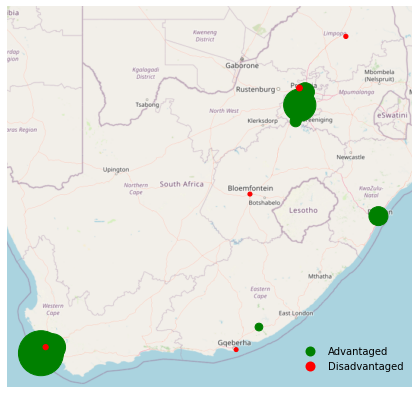

In [7]:
colors = [ (0 / 255, 128 / 255, 0 / 255), (255 / 255, 0 / 255, 0 / 255)]
cm = LinearSegmentedColormap.from_list('minard', colors)
ax = gplt.webmap(SouthAfrica, projection=gcrs.WebMercator())
gplt.pointplot(
    gdf0, projection=gcrs.AlbersEqualArea(),
    scale='Number', limits=(4, 45), hue='Historical Advantage', cmap=cm,legend=True,legend_kwargs={'bbox_to_anchor': (1, 0.13), 'frameon': False},
    ax=ax
)
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.savefig('Point_with_NA_HA.png', bbox_inches = 'tight', dpi=300)

In [8]:
df1 = pd.read_csv('Numb.csv', encoding='latin-1')
Count1 = pd.crosstab(index=df1['Curated Inst'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0                                   counts    percent
Curated Inst                                             
Durban University of Technology             10   0.693001
Medical University of Southern Africa       23   1.593902
Nelson Mandela Metropolitan University       6   0.415800
North-West University                       71   4.920305
Others                                     117   8.108108
Rhodes University                           40   2.772003
South African Medical Research Council       8   0.554401
University of Cape Town                    379  26.264726
University of Kwazulu-Natal                142   9.840610
University of Limpopo                        8   0.554401
University of Pretoria                     138   9.563410
University of Stellenbosch                 215  14.899515
University of Western Cape                  17   1.178101
University of the Free State                 6   0.415800
University of the Witwatersrand            263  18.225918

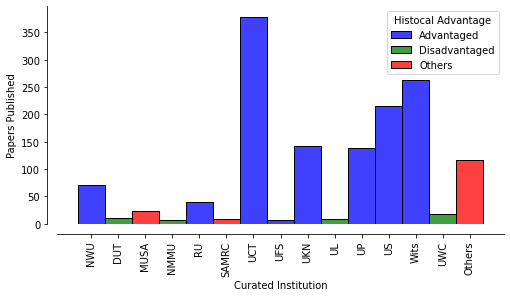

In [9]:
sns.histplot(x="Curated Institution",
             hue="Histocal Advantage", palette=["b","g","r"], multiple="stack",
            data=df1),
sns.despine(offset=10, trim=False)
plt.xticks(rotation=90)
plt.ylabel('Papers Published')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.savefig('Hist_papers_published_HA.png', bbox_inches = 'tight', dpi=300)

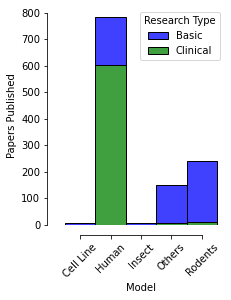

In [10]:
df2 = pd.read_csv('dat_rename.csv', encoding='latin-1')
df21 = df2.sort_values(by=['Model'],ascending=True)
sns.histplot(x="Model",
             hue="Research Type", palette=["b","g"], multiple="stack",
            data=df21),
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Papers Published')
fig = plt.gcf()
fig.set_size_inches(3, 4)
plt.savefig('Hist_Model.png', bbox_inches = 'tight', dpi=300)

In [11]:
Count4 = pd.crosstab(index=df2['Model'], columns='counts')
Count4['percent'] = (Count4['counts'] / Count4['counts'].sum()) * 100
Count4

col_0      counts    percent
Model                       
Cell Line       5   0.423370
Human         782  66.215072
Insect          5   0.423370
Others        148  12.531753
Rodents       241  20.406435

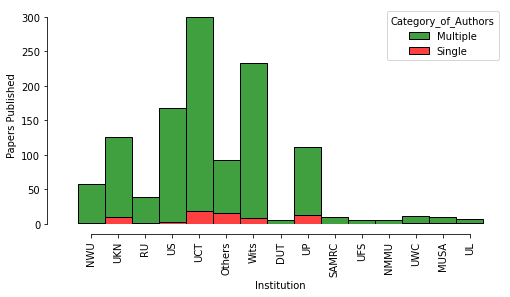

In [13]:
sns.histplot(x="INSTI",
             hue="Category_of_Authors", palette=["g","r"], multiple="stack",
            data=df2),
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
plt.ylabel('Papers Published')
plt.xlabel('Institution')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.savefig('Hist Cat Auth.png', bbox_inches = 'tight', dpi=300)

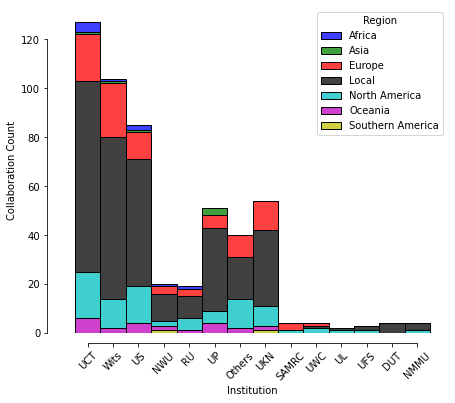

In [14]:
df3 = pd.read_csv('COLAB_SA.csv',encoding='latin-1')
df31 = df3.sort_values(by=['Region'],ascending=True)
sns.histplot(x="INSTI",
             hue="Region", palette=["b","g","r","k","c","m","y"], multiple="stack",
            data=df31),
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Collaboration Count')
plt.xlabel('Institution')
fig = plt.gcf()
fig.set_size_inches(7, 6)
plt.savefig('Colab.png', bbox_inches = 'tight', dpi=300)

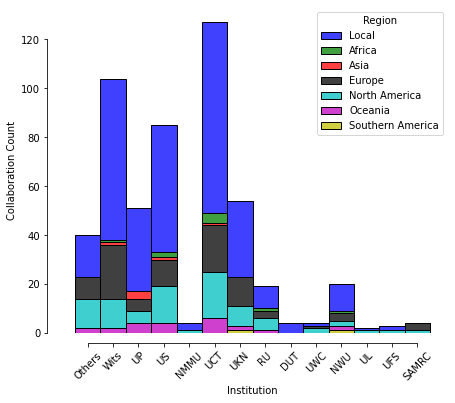

In [15]:
sns.histplot(x="INSTI",
             hue="Region", palette=["b","g","r","k","c","m","y"], multiple="stack",
            data=df3),
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Collaboration Count')
plt.xlabel('Institution')
fig = plt.gcf()
fig.set_size_inches(7, 6)
plt.savefig('Colab.png', bbox_inches = 'tight', dpi=300)

In [16]:
Count2 = pd.crosstab(index=df3['Region'], columns='counts')
Count2['percent'] = (Count2['counts'] / Count2['counts'].sum()) * 100
Count2

col_0             counts    percent
Region                             
Africa                 9   1.727447
Asia                   6   1.151631
Europe                88  16.890595
Local                309  59.309021
North America         84  16.122841
Oceania               23   4.414587
Southern America       2   0.383877

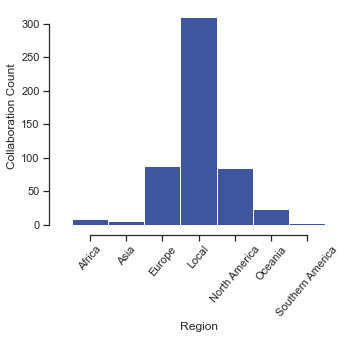

In [17]:
sns.set_theme(style="ticks", palette="dark")
sns.histplot(x="Region",
            data=df31)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=50)
plt.ylabel('Collaboration Count')
fig = plt.gcf()
fig.set_size_inches(5, 4)
plt.savefig('st_papers_published_.png', bbox_inches = 'tight', dpi=300)

C:\Users\user\.conda\envs\stat\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\user\.conda\envs\stat\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(
C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:1427: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

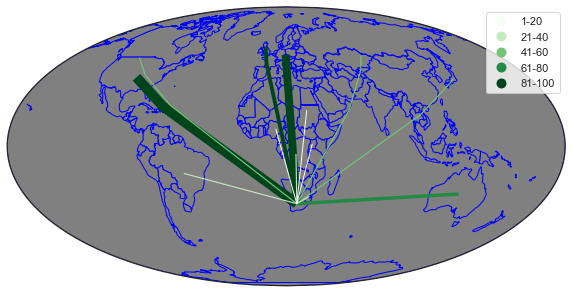

In [20]:
df4 = pd.read_csv('COLAB_SCALE.csv',encoding='latin-1')
df4.head()
gdf4 = gpd.GeoDataFrame(df4, geometry=gpd.points_from_xy(df4.Lon1, df4.Lat1))
gdf4['geom2'] = [Point(x, y) for x, y in zip(df4.Lon2, df4.Lat2)]
gdf4['multi'] = [MultiPoint([x, y]) for x, y in zip(gdf4.geometry, gdf4.geom2)]
cleaned_gdf4 = gdf4.set_geometry('multi').drop(['geometry', 'geom2'], axis=1)
world = gpd.read_file(gplt.datasets.get_path('world'))
scheme = mc.Quantiles(cleaned_gdf4['NUM'], k=5)
ax = gplt.sankey(
    cleaned_gdf4, projection=gcrs.Mollweide(),
    scale='NUM', limits=(1, 10),
    hue='NUM', cmap='Greens', scheme=scheme,legend_labels=[
        '1-20', '21-40', '41-60',
        '61-80', '81-100'
    ], legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='gray', edgecolor='blue'
)
ax.set_global(); ax.outline_patch.set_visible(True)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.savefig('External_Colaboration_Scale.png', bbox_inches = 'tight', dpi=350)

In [23]:
c2 = pd.crosstab(index=df2['Research Type'], columns='counts')
c2['percent'] = (c2['counts'] / c2['counts'].sum()) * 100
c2

col_0          counts    percent
Research Type                   
Basic             560  47.417443
Clinical          621  52.582557

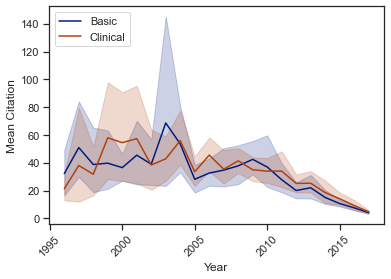

In [25]:
sns.lineplot(x='Year', y='Citations', hue='Research Type',
palette="dark",markers=True,dashes=False, data=df2)
plt.xticks(rotation=45)
plt.ylabel('Mean Citation')
plt.legend(loc = 'upper left')
plt.savefig('Time_Series_papers_Mean_citation.png', dpi=300)

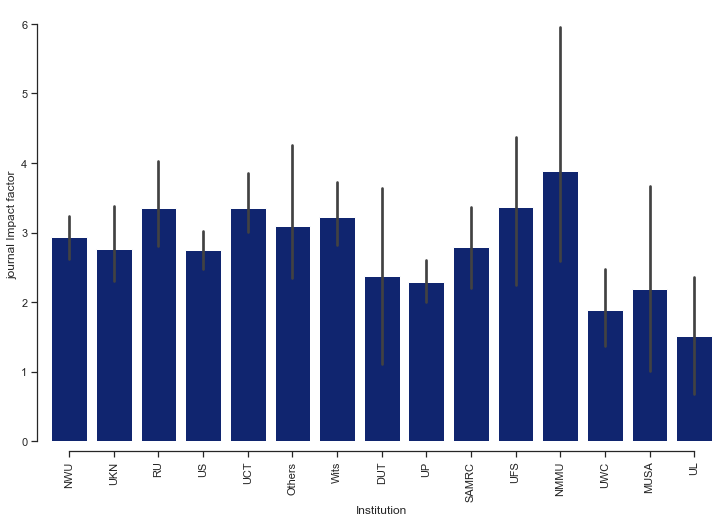

In [26]:
sns.set_theme(style="ticks", palette="dark")
plt.figure(figsize=(10,8))
sns.barplot(x="INSTI", y="Impact",palette=["b"],
            data=df2)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
plt.ylabel('journal Impact factor')
plt.xlabel('Institution')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig('Bar_papers_published_Mean Citation.png', bbox_inches = 'tight', dpi=300)

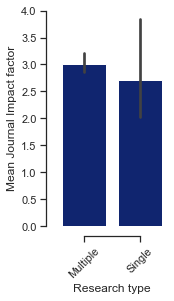

In [27]:
sns.set_theme(style="ticks", palette="dark")
plt.figure(figsize=(10,8))
sns.barplot(x="Category_of_Authors", y="Impact",palette=["b"],
            data=df2)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Mean Journal Impact factor')
plt.xlabel('Research type')
fig = plt.gcf()
fig.set_size_inches(2, 4)
plt.savefig('Bar_papers_published_Mean Citation.png', bbox_inches = 'tight', dpi=300)

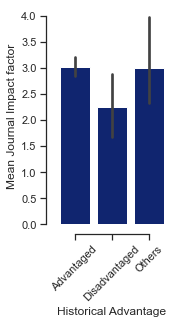

In [28]:
df22 = pd.read_csv('dat_rename.csv', encoding='latin-1')
df23 = df22.sort_values(by=['Historical Advantage'],ascending=True)
sns.set_theme(style="ticks", palette="dark")
plt.figure(figsize=(10,8))
sns.barplot(x="Historical Advantage", y="Impact",palette=["b"],
            data=df23)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Mean Journal Impact factor')
plt.xlabel('Historical Advantage')
fig = plt.gcf()
fig.set_size_inches(2, 4)
plt.savefig('Bar_papers_HAdv Impact.png', bbox_inches = 'tight', dpi=300)

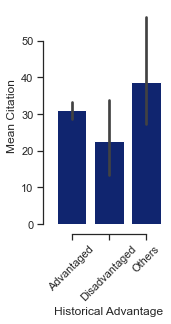

In [29]:
sns.set_theme(style="ticks", palette="dark")
plt.figure(figsize=(10,8))
sns.barplot(x="Historical Advantage", y="Citations",palette=["b"],
            data=df23)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Mean Citation')
plt.xlabel('Historical Advantage')
fig = plt.gcf()
fig.set_size_inches(2, 4)
plt.savefig('Bar_papers_HAdv Citation.png', bbox_inches = 'tight', dpi=300)

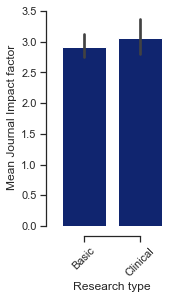

In [30]:
sns.set_theme(style="ticks", palette="dark")
plt.figure(figsize=(10,8))
sns.barplot(x="Research Type", y="Impact",palette=["b"],
            data=df2)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Mean Journal Impact factor')
plt.xlabel('Research type')
fig = plt.gcf()
fig.set_size_inches(2, 4)
plt.savefig('Bar_papers_published_Mean Citation.png', bbox_inches = 'tight', dpi=300)

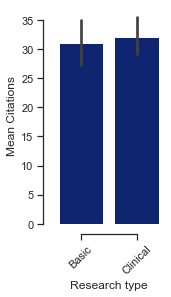

In [31]:
sns.set_theme(style="ticks", palette="dark")
plt.figure(figsize=(10,8))
sns.barplot(x="Research Type", y="Citations",palette=["b"],
            data=df2)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Mean Citations')
plt.xlabel('Research type')
fig = plt.gcf()
fig.set_size_inches(2, 4)
plt.savefig('Bar_papers_published Citation.png', bbox_inches = 'tight', dpi=300)